## import libraries

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [436]:
feature_data=pd.read_csv('C:\\Users\\compu dream\\Desktop\\E Commerce Dataset (1).csv') #load data

In [437]:
feature_data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


## Clean Data 

In [438]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [439]:
feature_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [440]:
feature_data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [441]:
for col in ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']:
    feature_data[col].fillna(feature_data[col].mean(), inplace=True) # fill nulls in Numerical Data 

In [442]:
label_encoder = LabelEncoder()
for col in ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']:
    feature_data[col] = label_encoder.fit_transform(feature_data[col]) # fill nulls in Categorical Data  

In [456]:
feature_filter=['Churn','Tenure','CashbackAmount','OrderCount','Complain','SatisfactionScore','HourSpendOnApp',]
model_feature= pd.DataFrame(feature_data[feature_filter])
model_feature.head()

,Churn,Tenure,CashbackAmount,OrderCount,Complain,SatisfactionScore,HourSpendOnApp
0,1,4.000000,160,1.0,1,2,3.000000
1,1,10.189899,121,1.0,1,3,3.000000
2,1,10.189899,120,1.0,1,3,2.000000
3,1,0.000000,134,1.0,0,5,2.000000
4,1,0.000000,130,1.0,0,5,2.931535


## Data Visualization

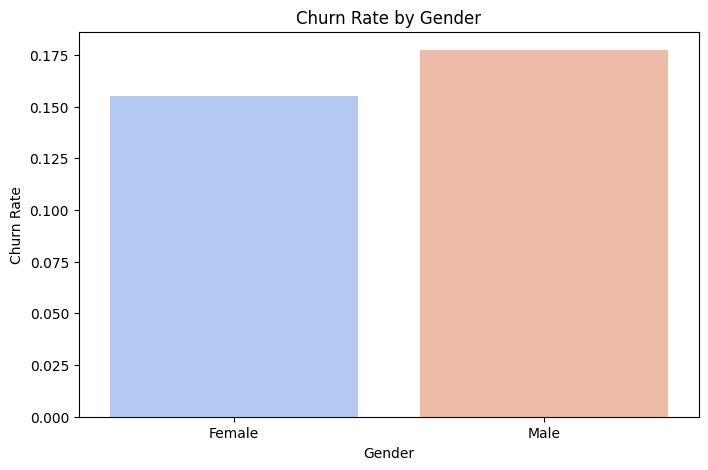

In [444]:
plt.figure(figsize=(8,5))
gender_churn = feature_data.groupby('Gender')['Churn'].mean()
sns.barplot(x=gender_churn.index, y=gender_churn.values, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.show()

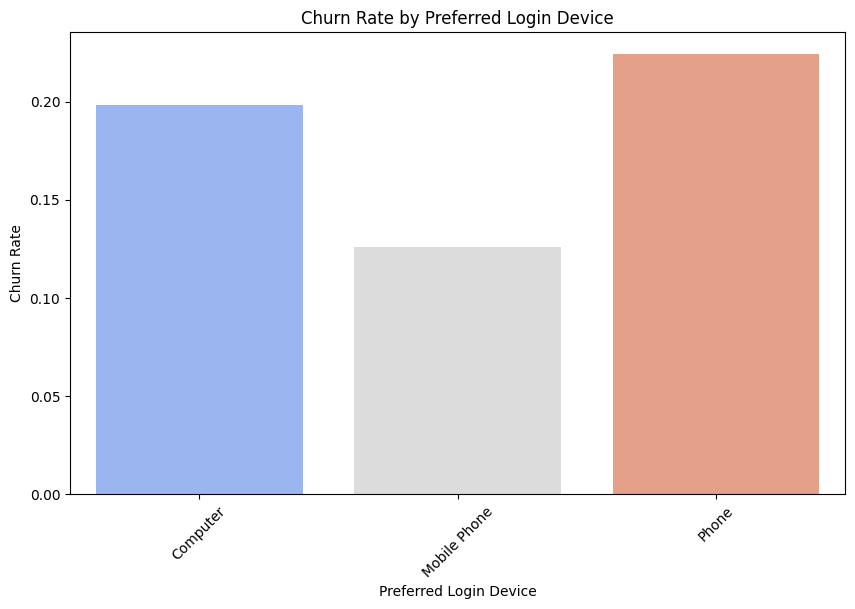

In [445]:
plt.figure(figsize=(10, 6))
device_churn =feature_data.groupby('PreferredLoginDevice')['Churn'].mean()
sns.barplot(x=device_churn.index, y=device_churn.values, palette='coolwarm')
plt.title('Churn Rate by Preferred Login Device')
plt.ylabel('Churn Rate')
plt.xlabel('Preferred Login Device')
plt.xticks(rotation=45)
plt.show()

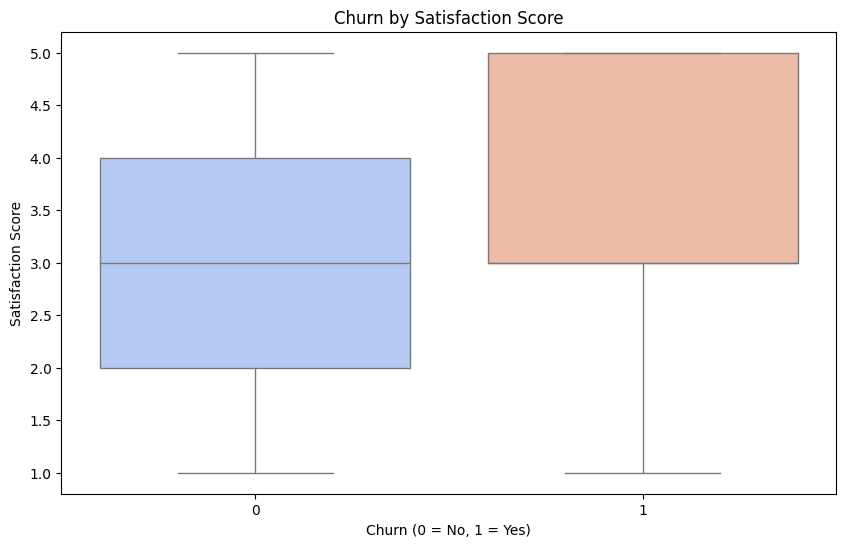

In [446]:
plt.figure(figsize=(10, 6))
plt.title('Churn by Satisfaction Score')
sns.boxplot(x='Churn', y='SatisfactionScore', data=feature_data, palette='coolwarm')#Churn Rate by Satisfaction Score
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Satisfaction Score')
plt.show()

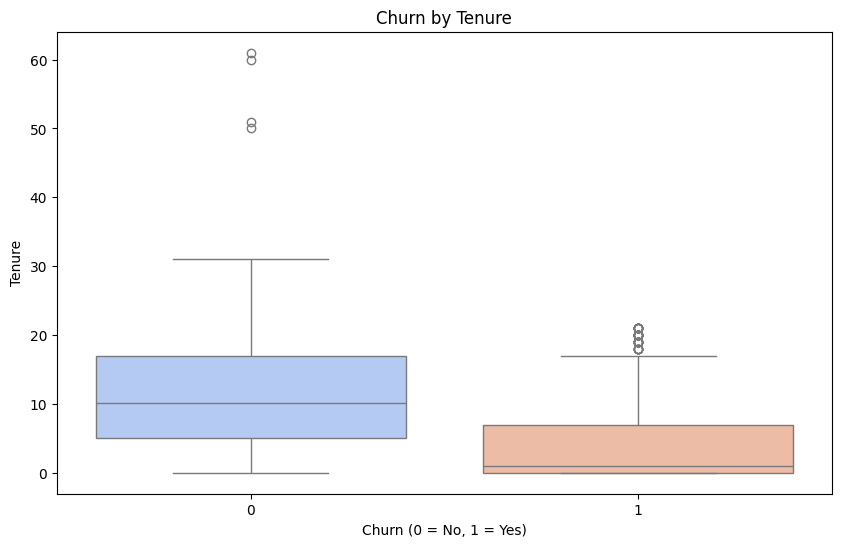

In [447]:
plt.figure(figsize=(10, 6))
plt.title('Churn by Tenure')
sns.boxplot(x='Churn', y='Tenure', data=feature_data, palette='coolwarm') #Churn by Tenure
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure')
plt.show()

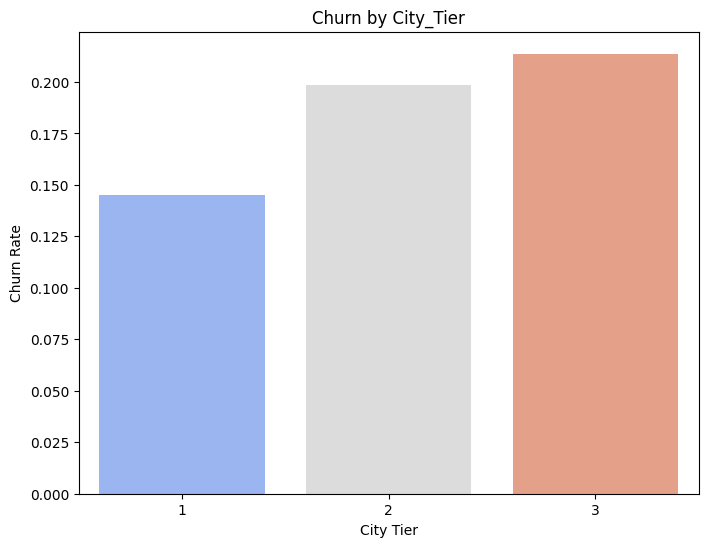

In [453]:
plt.figure(figsize=(8, 6))
citytier_churn = feature_data.groupby('CityTier')['Churn'].mean()
sns.barplot(x=citytier_churn.index, y=citytier_churn.values, palette='coolwarm')
plt.title('Churn by City_Tier')
plt.ylabel('Churn Rate')
plt.xlabel('City Tier')
plt.show()

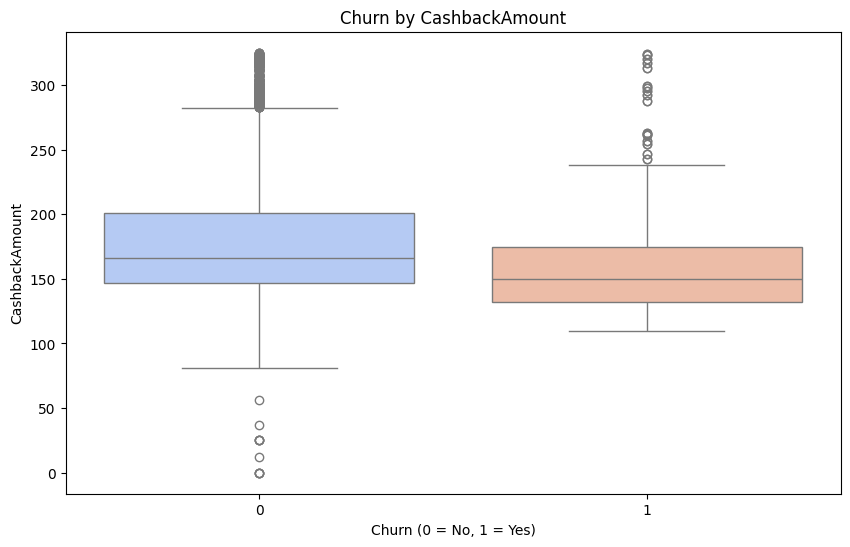

In [455]:
plt.figure(figsize=(10, 6))
plt.title('Churn by CashbackAmount')
sns.boxplot(x='Churn', y='CashbackAmount', data=feature_data, palette='coolwarm') #Churn by Tenure
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('CashbackAmount')
plt.show()

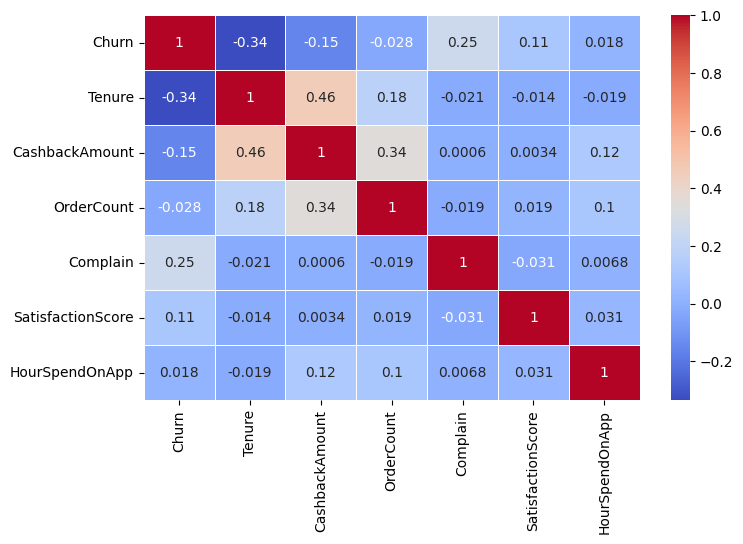

In [426]:
plt.figure(figsize=(8,5))
sns.heatmap(model_feature.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## Data Modeling 

In [388]:
X =model_feature.drop(columns='Churn')
y = feature_data['Churn']

In [389]:
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [390]:
model= RandomForestClassifier(random_state=42, class_weight='balanced',n_estimators=100)

In [391]:
model.fit(x_trian,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [392]:
scores = cross_val_score(model, x, y, cv=5) 
print("Cross_validation scores:", scores)

Cross_validation scores: [0.96802842 0.95293073 0.96625222 0.96536412 0.97602131]


In [393]:
pre=model.predict(x_test)

In [394]:
# Model Traning Score
model_traning=model.predict(x_trian) 
traning_scroe=accuracy_score(model_traning,y_train)
traning_scroe

0.9882326820603907

In [395]:
# Model Test Score
model_test=model.predict(x_test)
testing_scroe=accuracy_score(model_test,y_test)
testing_scroe

0.9422735346358793

In [449]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [450]:
feature_importances =model.feature_importances_
print(feature_importances)

[0.04183515 0.07921029 0.08125988 0.08610181 0.32163069 0.38996217]


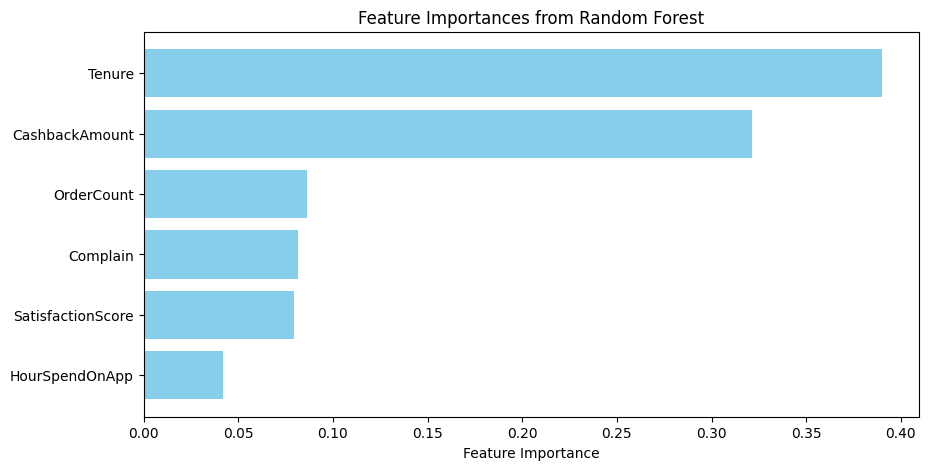

In [451]:
importances = model.feature_importances_
feature_names =x.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names,importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest")
plt.show()